# Week 06: Business Statistics & Analytics - E-commerce Analysis

## Learning Objectives
By the end of this exercise, you will be able to:
- Calculate key business metrics using pandas
- Create meaningful visualizations for business insights
- Apply statistical concepts to real business scenarios
- Make data-driven recommendations

---

## Business Context

You're working as a Data Analyst for **TechMart**, an e-commerce company. Your manager needs insights from last quarter's sales data to inform strategic decisions for the upcoming quarter.

Your analysis will help answer critical questions about customer behavior, regional performance, and product trends that directly impact business growth.

## Dataset Setup

First, let's generate the synthetic dataset you'll be analyzing:

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducible results
np.random.seed(42)

# Generate 500 orders from 2023
n_orders = 500

# Create order IDs and customer data
order_id = np.arange(1, n_orders + 1)
customer_id = np.random.randint(1, 101, size=n_orders)
customer_segment = np.random.choice(["Student", "Professional", "Senior"], size=n_orders, p=[0.4, 0.4, 0.2])
region = np.random.choice(["North", "South", "East", "West"], size=n_orders)
order_date = pd.date_range(start="2023-01-01", periods=n_orders, freq="D")
product_category = np.random.choice(["Electronics", "Clothing", "Books", "Home", "Sports"], size=n_orders)
quantity = np.random.randint(1, 5, size=n_orders)
unit_price = np.round(np.random.uniform(10, 200, size=n_orders), 2)
revenue = quantity * unit_price
discount_applied = np.random.choice([0, 5, 10, 15, 20, 25, 30], size=n_orders, p=[0.5,0.1,0.1,0.1,0.05,0.05,0.1])
payment_method = np.random.choice(["Credit Card", "PayPal", "Gift Card", "Debit Card"], size=n_orders)

# Build dataframe
df = pd.DataFrame({
    "order_id": order_id,
    "customer_id": customer_id,
    "customer_segment": customer_segment,
    "region": region,
    "order_date": order_date,
    "product_category": product_category,
    "quantity": quantity,
    "unit_price": unit_price,
    "revenue": revenue,
    "discount_applied": discount_applied,
    "payment_method": payment_method
})

# Save dataset for reference
df.to_csv("ecommerce_data.csv", index=False)
print("✅ Dataset created successfully!")

# Display first few rows
df.head()

✅ Dataset created successfully!


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


## Data Exploration

Let's start by understanding our dataset:

In [2]:
# Load the data
data = pd.read_csv("ecommerce_data.csv")

# Basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nDataset Shape:", data.shape)
print("\nFirst few rows:")
data.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          500 non-null    int64  
 1   customer_id       500 non-null    int64  
 2   customer_segment  500 non-null    object 
 3   region            500 non-null    object 
 4   order_date        500 non-null    object 
 5   product_category  500 non-null    object 
 6   quantity          500 non-null    int64  
 7   unit_price        500 non-null    float64
 8   revenue           500 non-null    float64
 9   discount_applied  500 non-null    int64  
 10  payment_method    500 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 43.1+ KB
None

Dataset Shape: (500, 11)

First few rows:


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


Monthly Revenue:
month
2023-01    6626.66
2023-02    6796.03
2023-03    8960.10
2023-04    7713.47
2023-05    7266.80
2023-06    7982.47
2023-07    7981.65
2023-08    6664.64
2023-09    9708.06
2023-10    7287.27
2023-11    8795.85
2023-12    8119.44
2024-01    7268.59
2024-02    8388.91
2024-03    6835.73
2024-04    7430.29
2024-05    4314.71
Freq: M, Name: revenue, dtype: float64


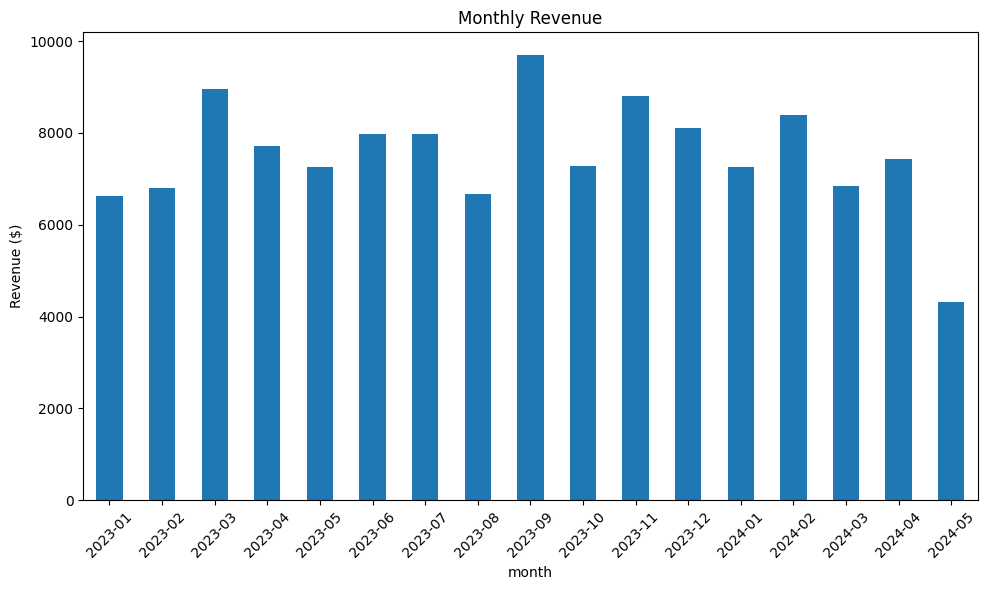

In [3]:
# Convert order_date to datetime and add helpful columns
data["order_date"] = pd.to_datetime(data["order_date"])
data["month"] = data["order_date"].dt.to_period("M")
data["day_of_week"] = data["order_date"].dt.day_name()

# Example: Revenue by month
monthly_revenue = data.groupby("month")["revenue"].sum()
print("Monthly Revenue:")
print(monthly_revenue)

# Plot monthly revenue
monthly_revenue.plot(kind="bar", figsize=(10,6), title="Monthly Revenue")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

## Business Questions

Now answer each of the following business questions. Use the starter code above as a reference, and expand your analysis to solve all questions.

### 1. Revenue Overview
What was the company's total revenue last quarter? Break it down by month.

In [7]:
# Your code here
last_quarter_revenue = monthly_revenue[-3:]
print("Last Quarter's Revenue:")
print(last_quarter_revenue)

Last Quarter's Revenue:
month
2024-03    6835.73
2024-04    7430.29
2024-05    4314.71
Freq: M, Name: revenue, dtype: float64


### 2. Top Customers
Who are the top 5 customers by total revenue contribution?

In [8]:
# Your code here
top_customers = data.groupby("customer_id")["revenue"].sum().sort_values(ascending=False)
top_5_customers = top_customers.head(5)
print(top_5_customers)

customer_id
62    4448.39
24    3369.44
90    2976.78
92    2838.74
97    2835.62
Name: revenue, dtype: float64


### 3. Segment Analysis
Which customer segment (Student, Professional, Senior) spends the most on average per order?

In [12]:
# Your code here
most_customer = data.groupby("customer_segment")["revenue"].mean().sort_values(ascending=False)
print("Customer Segment That Spends the Most:")
most_customer.head(1)

Customer Segment That Spends the Most:


customer_segment
Senior    262.133925
Name: revenue, dtype: float64

### 4. Regional Trends
Which region generated the highest revenue? Which region had the highest average order size?

In [20]:
# Your code here
high_region = data.groupby("region")["revenue"].sum().sort_values(ascending=False)
print("Region with the highest Revenue:")
print(high_region.head(1))
print('\n')

high_avg_order = data.groupby("region")["revenue"].mean().sort_values(ascending=False)
print("Region With the Highest Average Order SIze:")
print(high_avg_order.head(1))

Region with the highest Revenue:
region
South    34839.45
Name: revenue, dtype: float64


Region With the Highest Average Order SIze:
region
South    274.326378
Name: revenue, dtype: float64


### 5. Product Category Performance
Which product category is most popular by quantity vs. by revenue?

In [23]:
# Your code here
popular_product_quantity = data.groupby("product_category")["quantity"].sum().sort_values(ascending=False)
print("Product With Large Quantity:")
print(popular_product_quantity.head(1))
print('\n')

popular_product_revenue = data.groupby("product_category")["revenue"].sum().sort_values(ascending=False)
print("Product With High Revenue:")
print(popular_product_revenue.head(1))

Product With Large Quantity:
product_category
Home    269
Name: quantity, dtype: int64


Product With High Revenue:
product_category
Home    29871.47
Name: revenue, dtype: float64


### 6. Discount Effectiveness
Do discounted orders generate higher or lower revenue per order compared to non-discounted orders?

In [26]:
# Your code here
discount = data.groupby("discount_applied")["revenue"].agg(["sum", "mean", "count"])
print("Will Discounts Generate More Revenue Than Non-discounted Orders?")
print(discount)

Will Discounts Generate More Revenue Than Non-discounted Orders?
                       sum        mean  count
discount_applied                             
0                 60336.01  248.296337    243
5                 15747.94  266.914237     59
10                11639.38  264.531364     44
15                13906.68  283.809796     49
20                 6689.49  215.790000     31
25                 9040.83  301.361000     30
30                10780.34  245.007727     44


### 7. Payment Method Usage
What percentage of orders use each payment method? Does any payment method correlate with higher spending?

In [37]:
# Your code here
payment_counts = data["payment_method"].value_counts()
payment_percentage = (payment_counts / payment_counts.sum()) * 100
print("Percentage of Payment Method")
print(payment_percentage)
print('\n')

payment_spend = data.groupby("payment_method")["revenue"].mean().sort_values(ascending=False)
print("Payment Method with Highest Spending")
print(payment_spend.head(1))

Percentage of Payment Method
payment_method
Credit Card    27.4
Gift Card      24.8
Debit Card     24.6
PayPal         23.2
Name: count, dtype: float64


Payment Method with Highest Spending
payment_method
Debit Card    275.98065
Name: revenue, dtype: float64


### 8. Seasonality Check
Plot revenue by day of week — are weekends busier than weekdays?

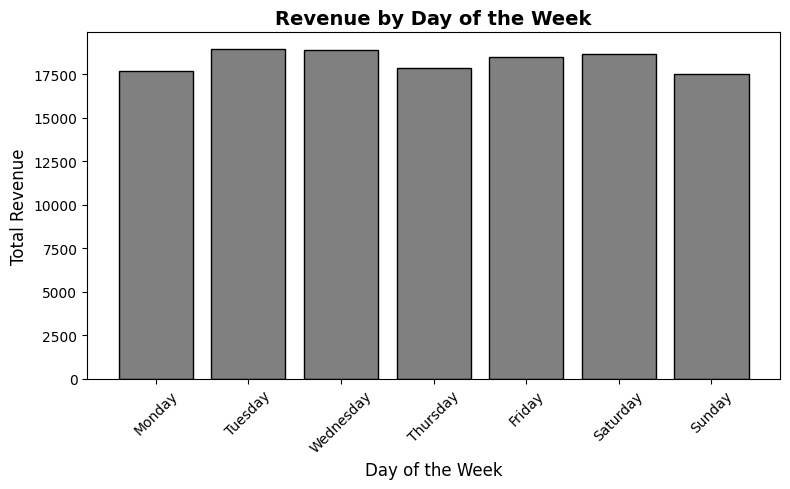

In [39]:
# Your code here
data["order_date"] = pd.to_datetime(data["order_date"])

data["day_of_week"] = data["order_date"].dt.day_name()

revenue_by_day = data.groupby("day_of_week")["revenue"].sum()

order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
revenue_by_day = revenue_by_day.reindex(order)

plt.figure(figsize=(8, 5))
plt.bar(revenue_by_day.index, revenue_by_day.values, color="gray", edgecolor="black")

plt.title("Revenue by Day of the Week", fontsize=14, fontweight='bold')
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 9. Profitability (Stretch)
Assume profit margin = 20% of revenue. Estimate total profit and identify the most profitable region.

In [44]:
# Your code here
data["profit"] = data["revenue"] * 0.20
total_profit = data["profit"].sum()
print(f"Total Profit: {total_profit:.2f}")
print('\n')

profit_by_region = data.groupby("region")["profit"].sum().sort_values(ascending=False)
print("Most Profitable Region:")
print(profit_by_region.head(1))




Total Profit: 25628.13


Most Profitable Region:
region
South    6967.89
Name: profit, dtype: float64


### 10. Business Recommendation
Based on your findings, recommend one strategy (e.g., focus on certain customer segments, increase discounts, promote specific regions/products).

**Your recommendation here:**

Upon further reviuew of the data given to me, I see that a ton of our buyers are Seniors, in the South, are willing to put there money on Non-Discounted products, most of them buy Houses and they prefer suing their Debit Card. My recommended strategy is to push more House sales down South to Seniors who are close to retirment.

---

## Submission Requirements

1. **Complete code** for all 10 questions
2. **Clear visualizations** where appropriate  
3. **Brief interpretation** of each result
4. **Final business recommendation** with supporting data

Remember: Focus on what the numbers tell us about the business, not just the calculations themselves.